In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
houseNumData =  pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [11]:
houseNumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
LotArea        1460 non-null int64
GrLivArea      1460 non-null int64
TotalBsmtSF    1460 non-null int64
GarageArea     1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(5)
memory usage: 57.2 KB


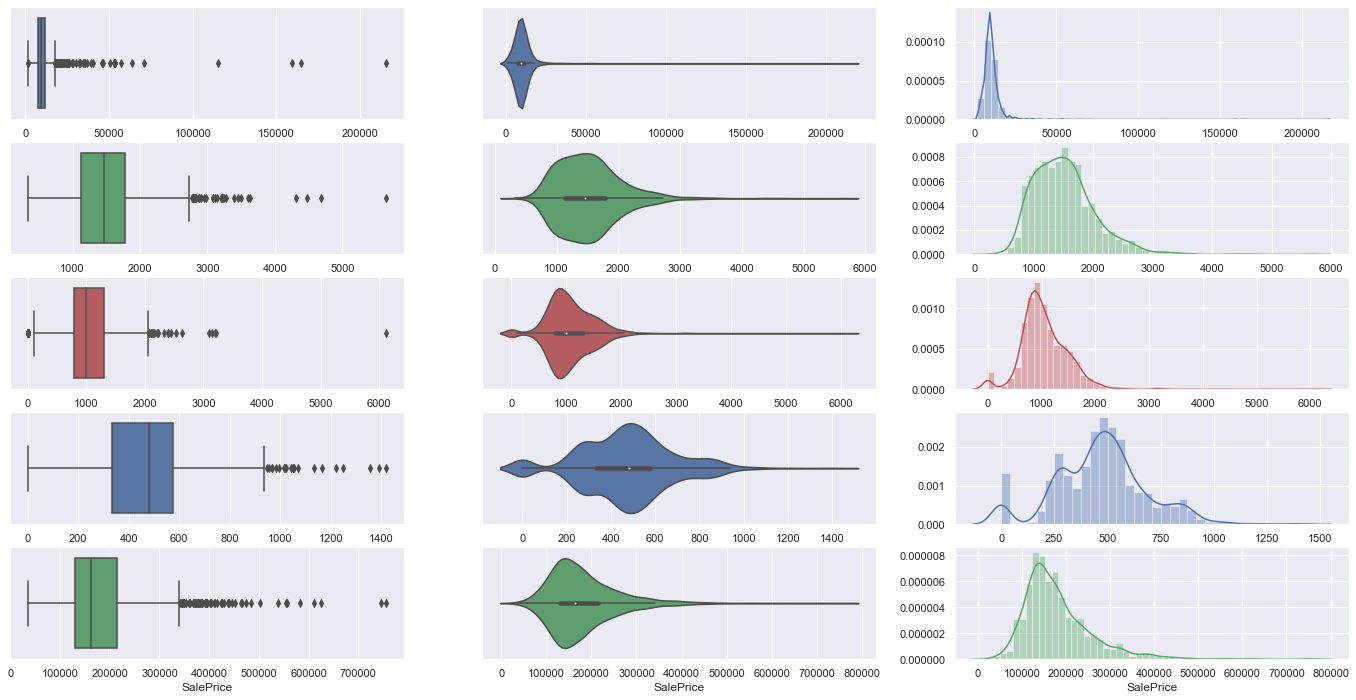

In [12]:
f, axes = plt.subplots(5, 3, figsize=(24, 12))


sb.boxplot(houseNumData['LotArea'], orient = "h", ax = axes[0,0] )
sb.violinplot(houseNumData['LotArea'], ax = axes[0,1])
sb.distplot(houseNumData['LotArea'],  ax = axes[0,2])

sb.boxplot(houseNumData['GrLivArea'], orient = "h", ax = axes[1,0] ,color = 'g')
sb.violinplot(houseNumData['GrLivArea'], ax = axes[1,1],color = 'g')
sb.distplot(houseNumData['GrLivArea'],  ax = axes[1,2],color = 'g')

sb.boxplot(houseNumData['TotalBsmtSF'], orient = "h", ax = axes[2,0],color = 'r')
sb.violinplot(houseNumData['TotalBsmtSF'], ax = axes[2,1],color = 'r')
sb.distplot(houseNumData['TotalBsmtSF'],  ax = axes[2,2],color = 'r')

sb.boxplot(houseNumData['GarageArea'], orient = "h", ax = axes[3,0])
sb.violinplot(houseNumData['GarageArea'], ax = axes[3,1])
sb.distplot(houseNumData['GarageArea'],  ax = axes[3,2])

sb.boxplot(houseNumData['SalePrice'], orient = "h", ax = axes[4,0],color = 'g')
sb.violinplot(houseNumData['SalePrice'], ax = axes[4,1],color = 'g')
sb.distplot(houseNumData['SalePrice'],  ax = axes[4,2],color = 'g')






In [13]:
print("LotArea skewness:",houseNumData['LotArea'].skew())
print("GrLivArea skewness:",houseNumData['GrLivArea'].skew())
print("TotalBsmtSF skewness:",houseNumData['TotalBsmtSF'].skew())
print("GarageArea skewness:",houseNumData['GarageArea'].skew())
print("SalePrice skewness:",houseNumData['SalePrice'].skew())


LotArea skewness: 12.207687851233496
GrLivArea skewness: 1.3665603560164552
TotalBsmtSF skewness: 1.5242545490627664
GarageArea skewness: 0.17998090674623907
SalePrice skewness: 1.8828757597682129


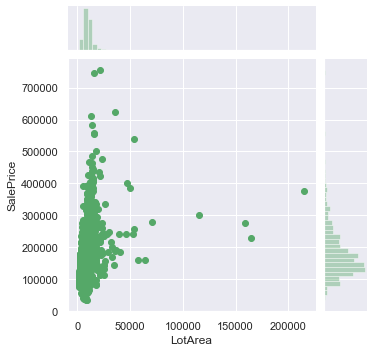

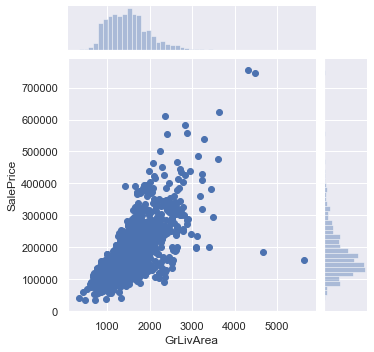

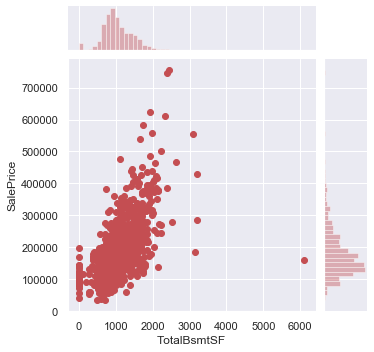

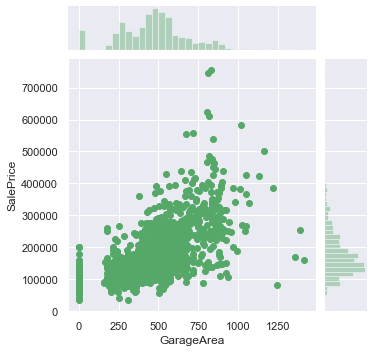

In [14]:
sb.jointplot(houseNumData['LotArea'], houseNumData['SalePrice'], height = 5, color = 'g')
sb.jointplot(houseNumData['GrLivArea'], houseNumData['SalePrice'], height = 5, color = 'b')
sb.jointplot(houseNumData['TotalBsmtSF'], houseNumData['SalePrice'], height = 5, color = 'r')
sb.jointplot(houseNumData['GarageArea'], houseNumData['SalePrice'], height = 5, color = 'g')

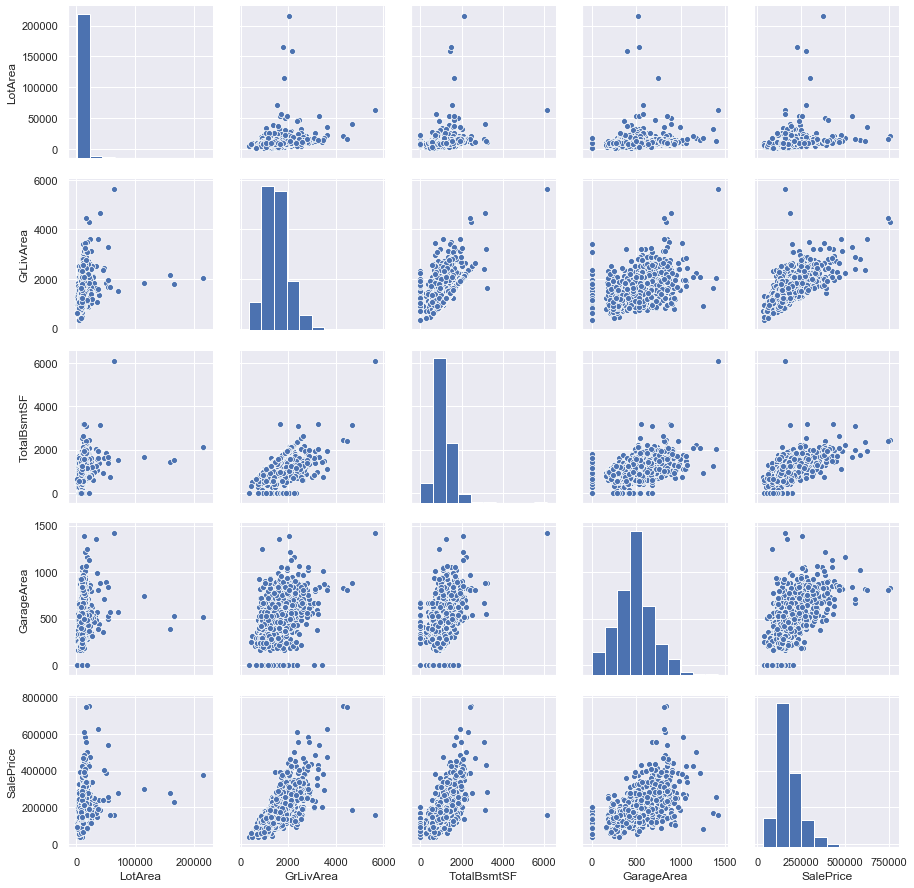

In [39]:
sb.pairplot(data = houseNumData)

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


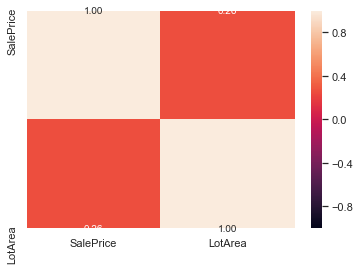

In [17]:
jointDF = pd.concat([houseNumData['SalePrice'], houseNumData["LotArea"].reindex(index= houseNumData['SalePrice'].index)], sort = False, axis = 1)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


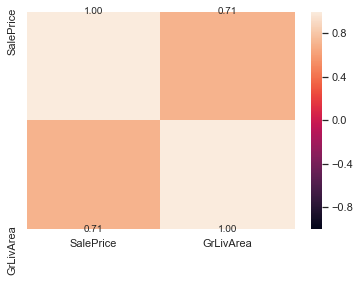

In [18]:
jointDF1 = pd.concat([houseNumData['SalePrice'], houseNumData['GrLivArea'].reindex(index= houseNumData['SalePrice'].index)], sort = False, axis = 1)
sb.heatmap(jointDF1.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF1.corr()

,SalePrice,TotalBsmtSF
SalePrice,1.000000,0.613581
TotalBsmtSF,0.613581,1.000000


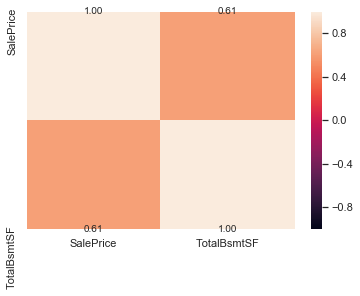

In [19]:
jointDF2 = pd.concat([houseNumData['SalePrice'], houseNumData['TotalBsmtSF'].reindex(index= houseNumData['SalePrice'].index)], sort = False, axis = 1)
sb.heatmap(jointDF2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF2.corr()

In [ ]:
jointDF3 = pd.concat([houseNumData['SalePrice'], houseNumData['GarageArea'].reindex(index= houseNumData['SalePrice'].index)], sort = False, axis = 1)
sb.heatmap(jointDF3.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF3.corr()

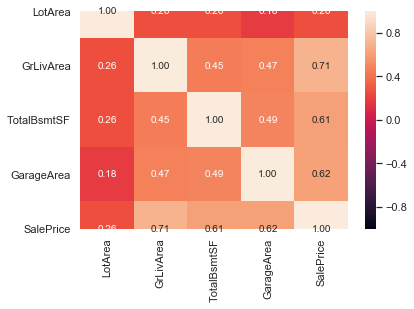

In [38]:
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Data interpretation

It seems like GrLivArea has the strongest correlation with the sales price = 0.71


and LotArea having the lowest correlation with sales price = 0.263

## Part Two



In [23]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


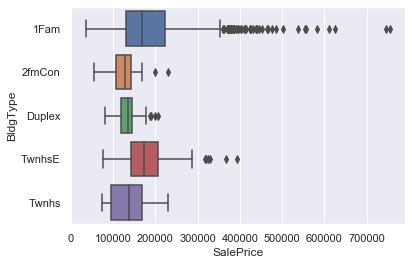

In [42]:
sb.boxplot(y ='BldgType', x = "SalePrice", data = houseData)

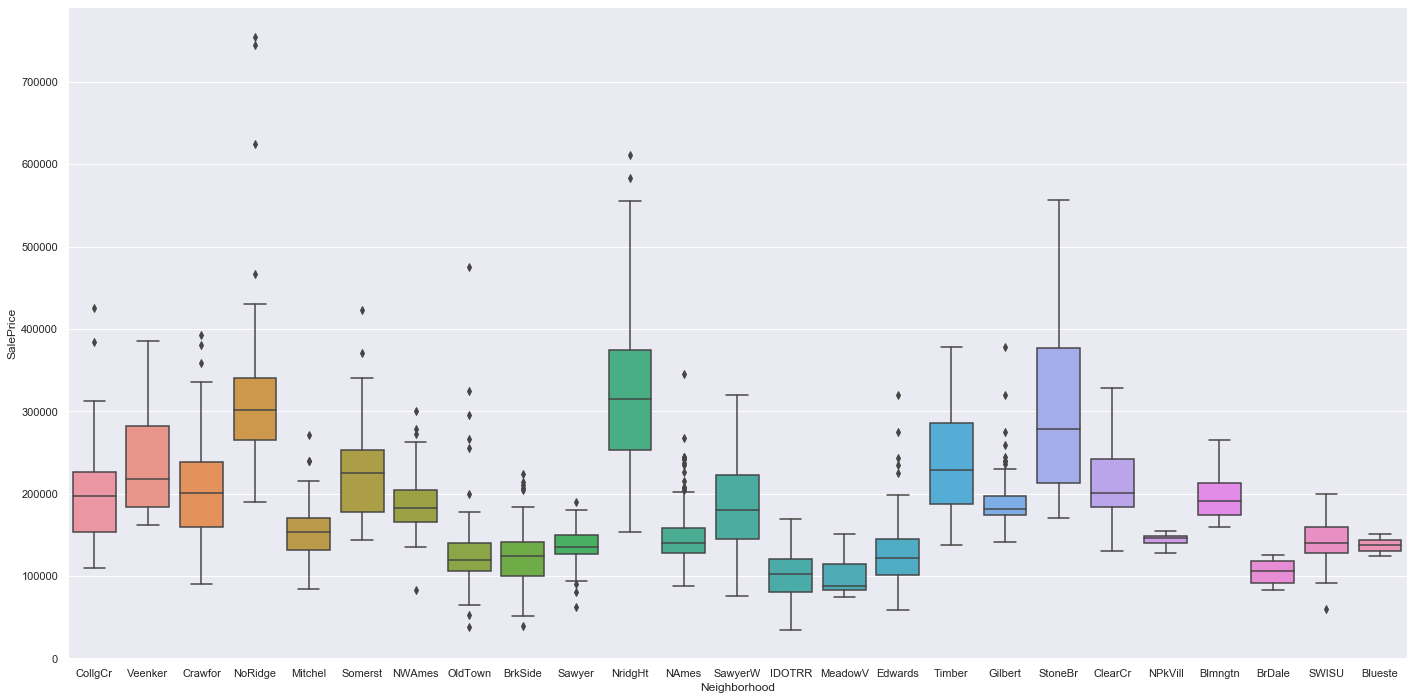

In [4]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x ='Neighborhood', y = "SalePrice", data = houseData)

In [48]:
houseCatdata = houseCatData.astype(dtype = "category")

In [49]:
houseCatdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null category
Neighborhood    1460 non-null category
BldgType        1460 non-null category
OverallQual     1460 non-null category
dtypes: category(4)
memory usage: 8.0 KB


1 and 2 : 1460


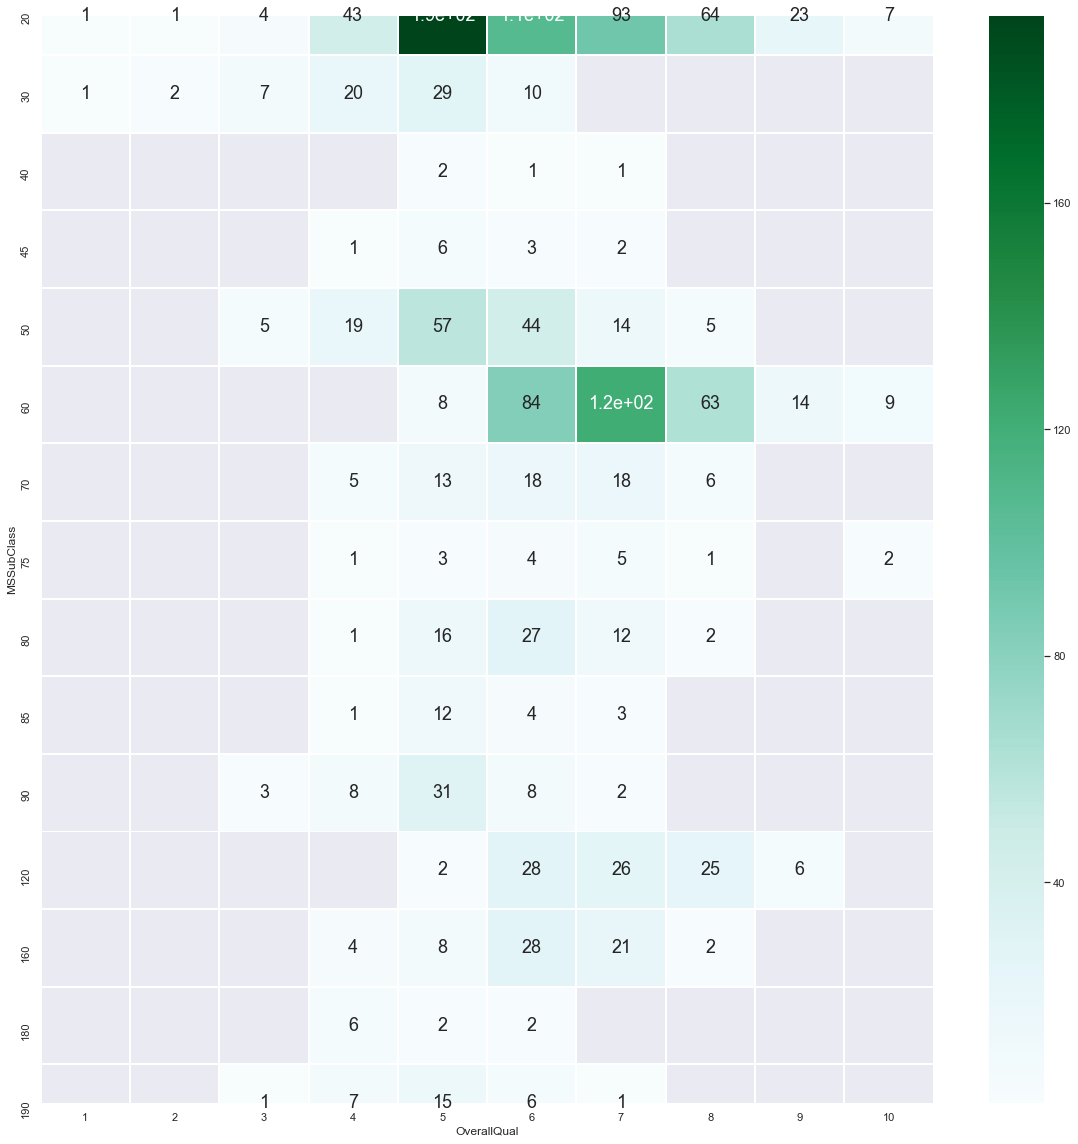

In [52]:

dualtype_data = houseCatdata[houseCatdata["OverallQual"].isnull() == False]
print( "1 and 2 :" ,len(dualtype_data))

# Distribution of the Two Types
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['MSSubClass','OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

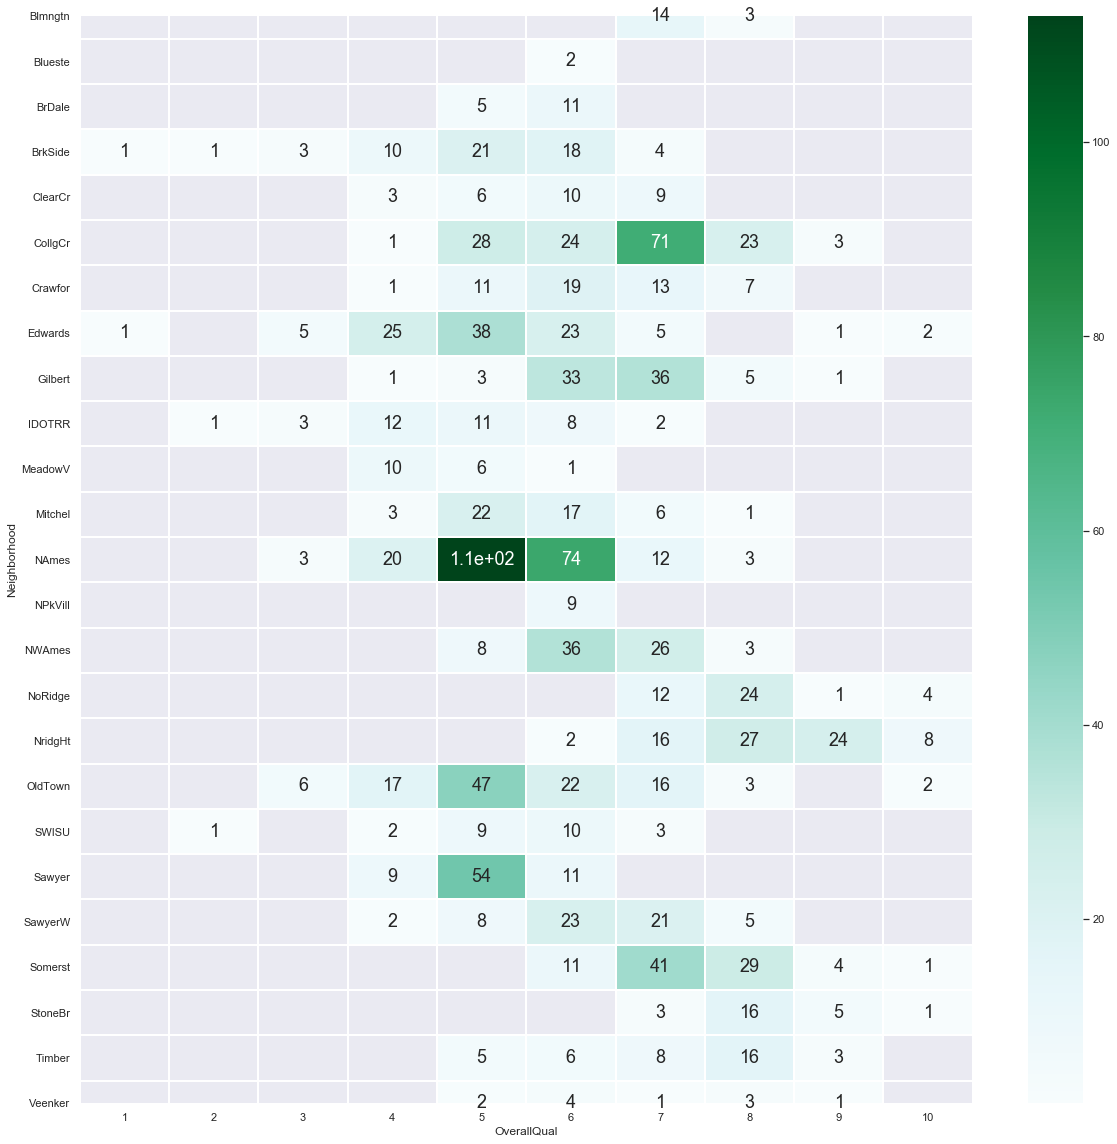

In [53]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['Neighborhood','OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

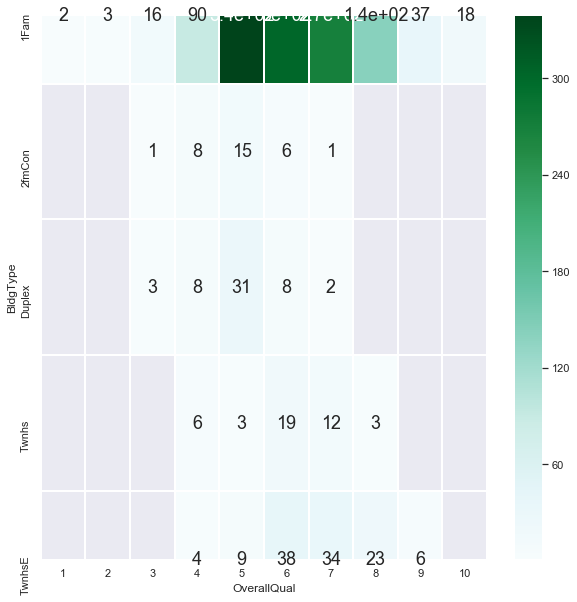

In [55]:
 plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(dualtype_data.groupby(['BldgType','OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")